# Problem Statement:

# Importing Libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [2]:
#importing dataset
data = pd.read_csv("/home/santosh/code_git/Data-Science-ML-Capstone-Projects/Automobile_insurance_fraud.csv")
#printing first 5 lines in the data
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [3]:
#size of the data
data.shape

(1000, 40)

In [4]:
#information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
#dropping _c39 column
data = data.drop(['_c39'], axis = 1)

In [6]:
#we are creating list for both categorical and numerical columns
cat_col = [col for col in data.columns if data[col].dtype == 'object']
num_col = [col for col in data.columns if data[col].dtype != 'object']
print(cat_col)
print()
print(num_col)

['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


# Exploratory Data Analysis

In [7]:
#lets check for the nul values
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [8]:
#lets have ook at where ? present in which columns in the dataset
for col in cat_col:
    print(col)
    print(data[col].value_counts())
    print("======================================================")

policy_bind_date
28-04-1992    3
01-01-2006    3
05-08-1992    3
15-05-1997    2
28-12-2002    2
             ..
15-01-1992    1
26-11-2001    1
15-06-2004    1
03-08-1994    1
07-11-2008    1
Name: policy_bind_date, Length: 951, dtype: int64
policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cl

# Exploratory Data Analysis

In [9]:
#Now lets replace the ? with the desired value 
data.collision_type = data.collision_type.replace('?', 'Rear Collision')

data.police_report_available = data.police_report_available.replace('?', 'YES')

data.property_damage = data.property_damage.replace('?', 'YES')

#we have replaced the ? values in the data set lets continue with EDA

In [10]:
data.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_number                1000.0  5.462386e+05  2.570630e+05   100804.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_number                335980.2500  533135.0  759099.750    999435.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital-gains                     0.0000       0.0   51025.000    100500.00  
capital-loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_number'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>],
       [<AxesSubplot:title={'center':'policy_annual_premium'}>,
        <AxesSubplot:title={'center':'umbrella_limit'}>,
        <AxesSubplot:title={'center':'insured_zip'}>,
        <AxesSubplot:title={'center':'capital-gains'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'incident_hour_of_the_day'}>,
        <AxesSubplot:title={'center':'number_of_vehicles_involved'}>,
        <AxesSubplot:title={'center':'bodily_injuries'}>],
       [<AxesSubplot:title={'center':'witnesses'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'injury_claim'}>,
        <AxesSubplot:title={'center':'property_claim'}>],
       [<AxesSubplot:title={'center':'vehicle_claim'}>,
        <Ax

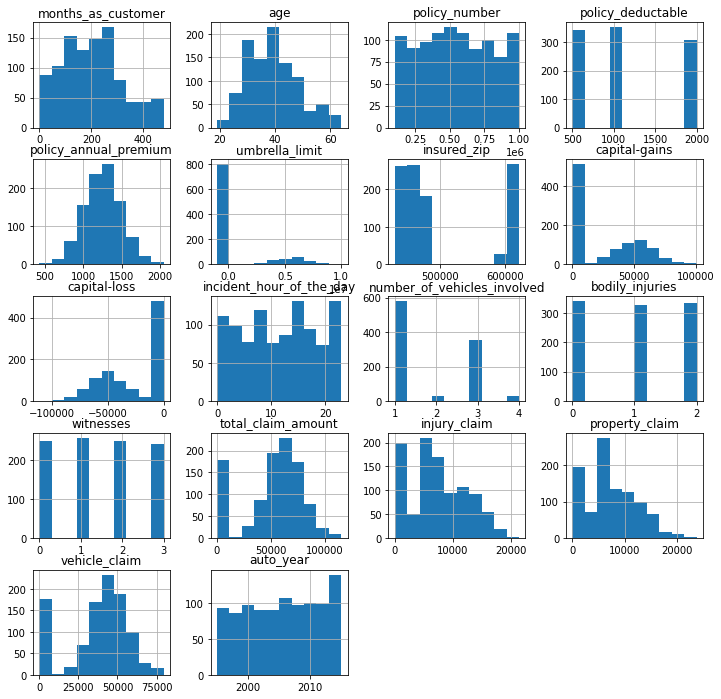

In [11]:
#plotting the hist bar of dataset
data.hist(figsize=(12,12), sharex=False)

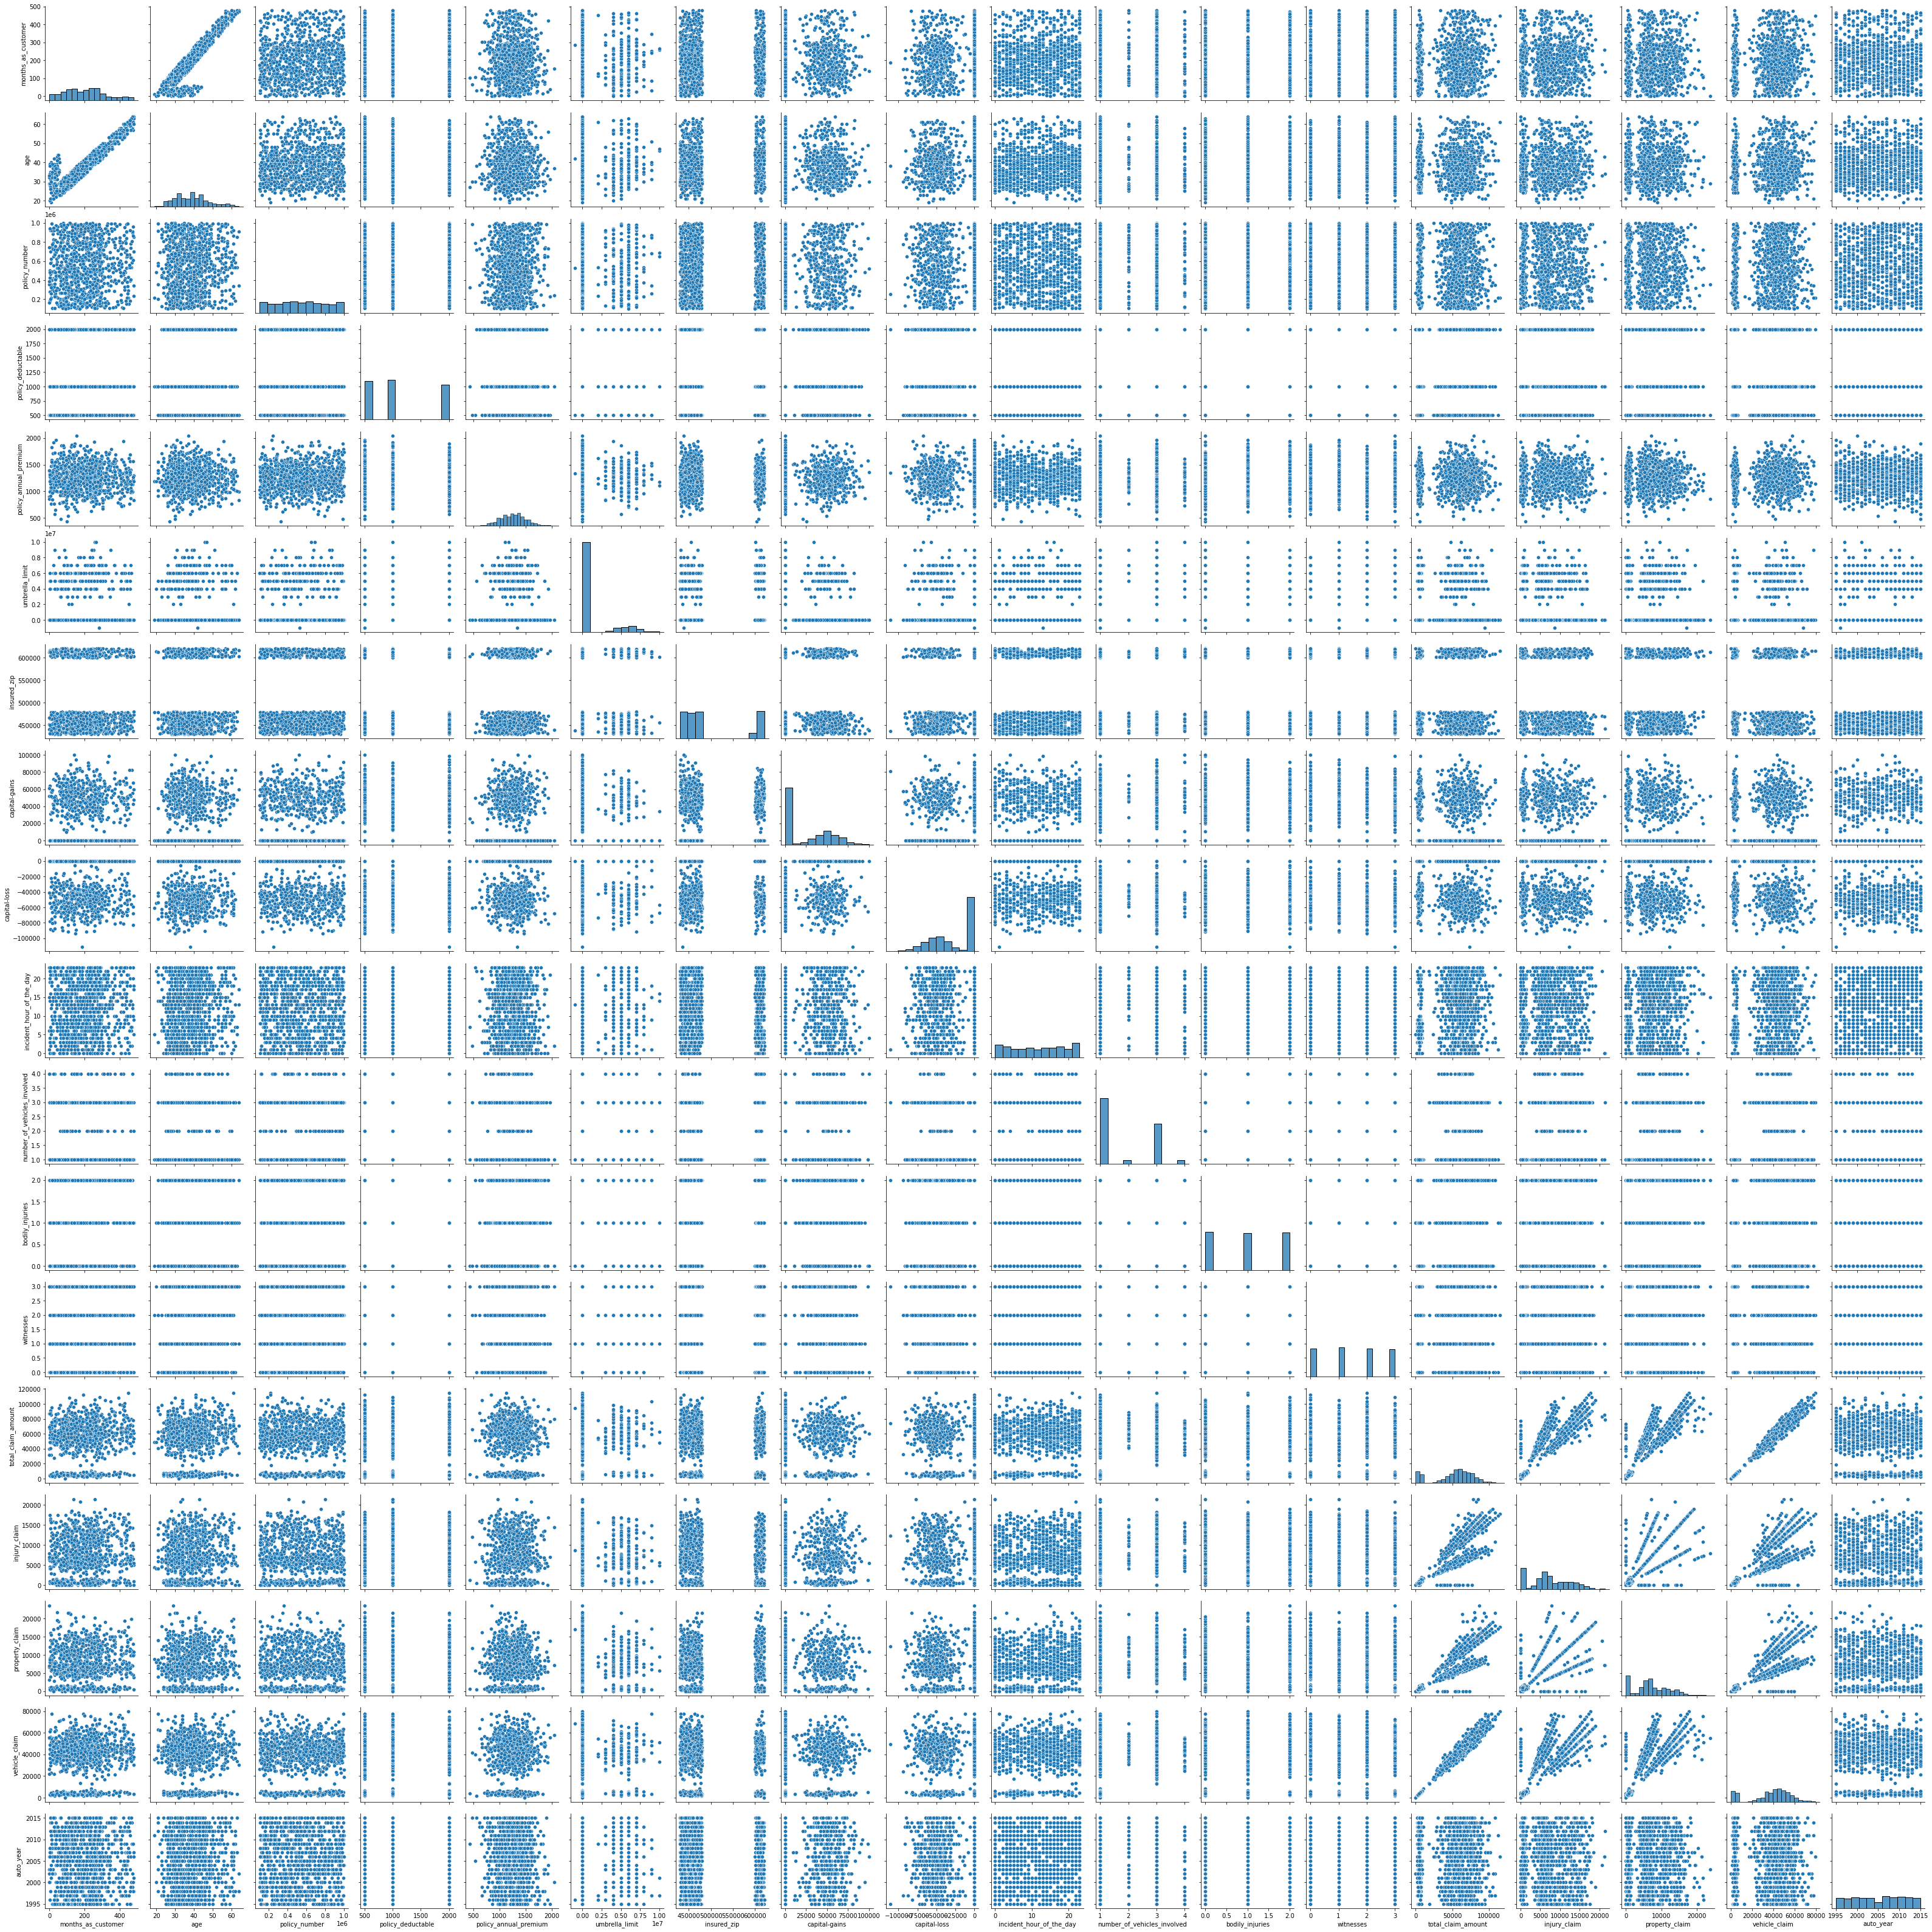

In [12]:
sns.pairplot(data)

In [13]:
#we will use a new library sweetviz for visualization report
report = sv.analyze(data)

report.show_html("fraud.html")

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:03 -> (00:00 left)


Report fraud.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Correlation

<AxesSubplot:>

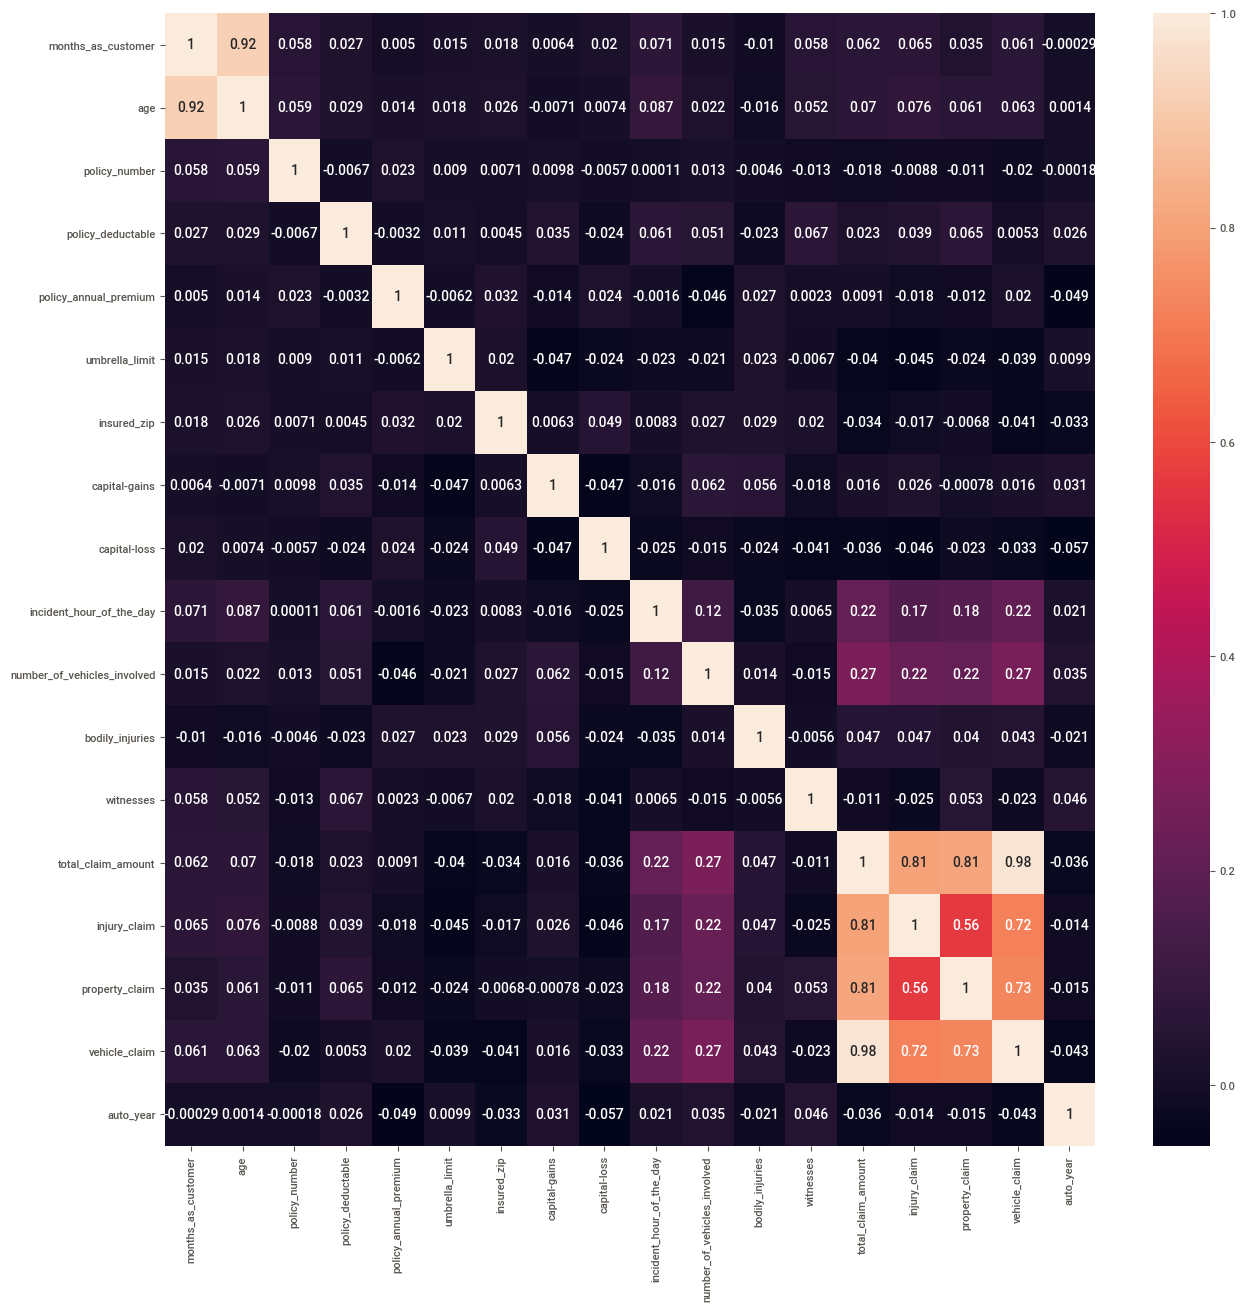

In [14]:
#lets find the correlation of the data using heaatmap
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot = True)

# Outliers

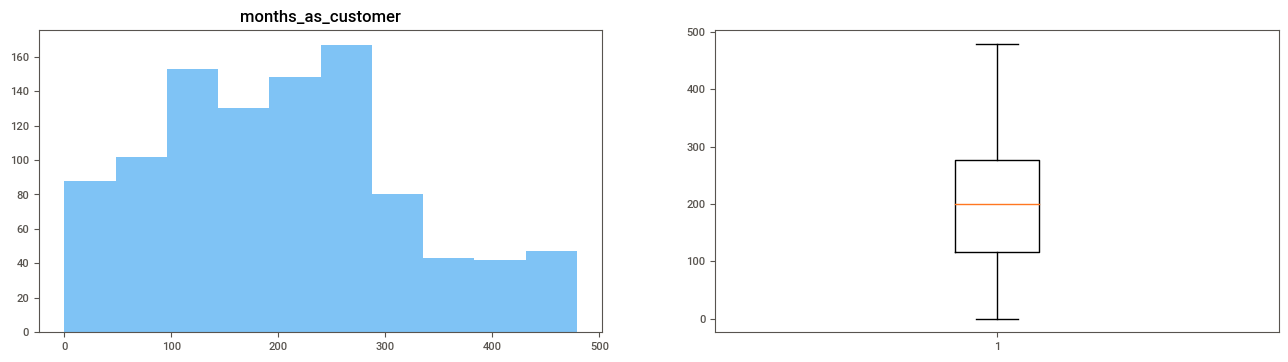

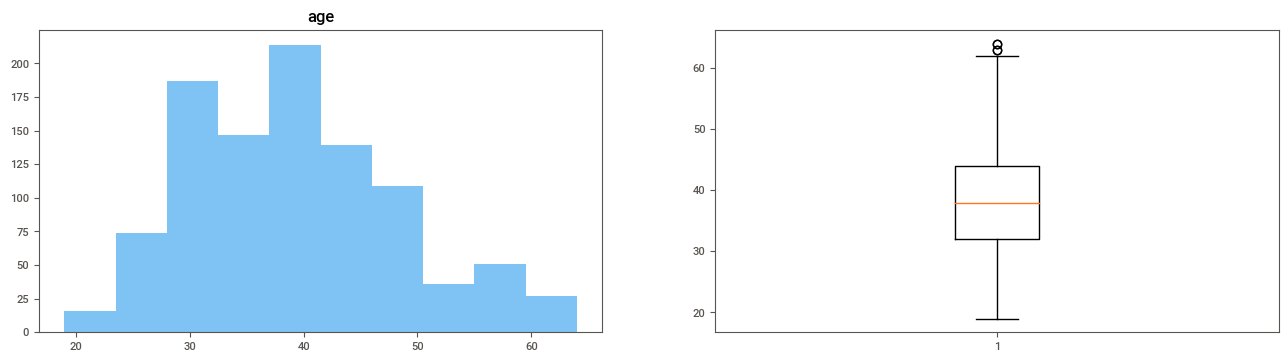

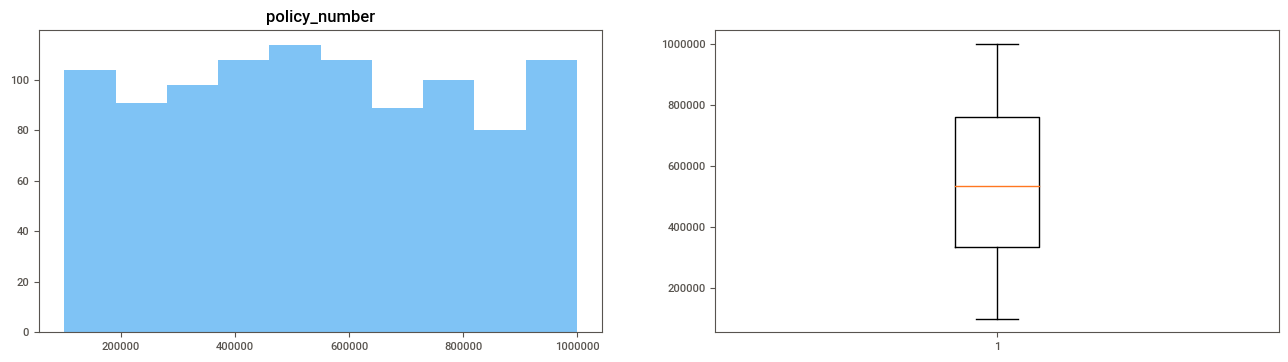

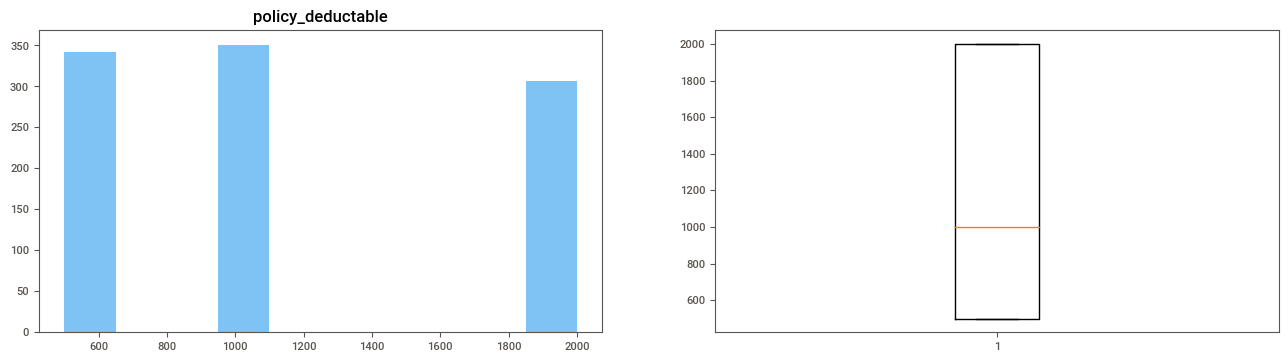

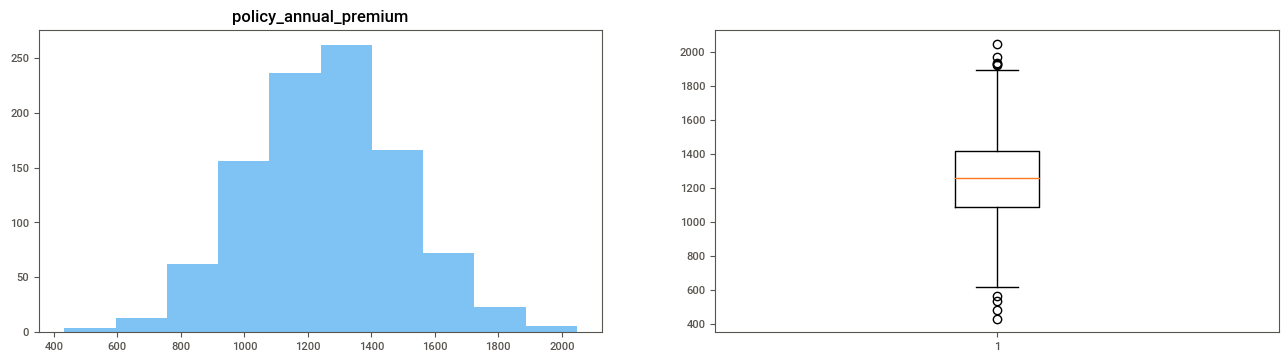

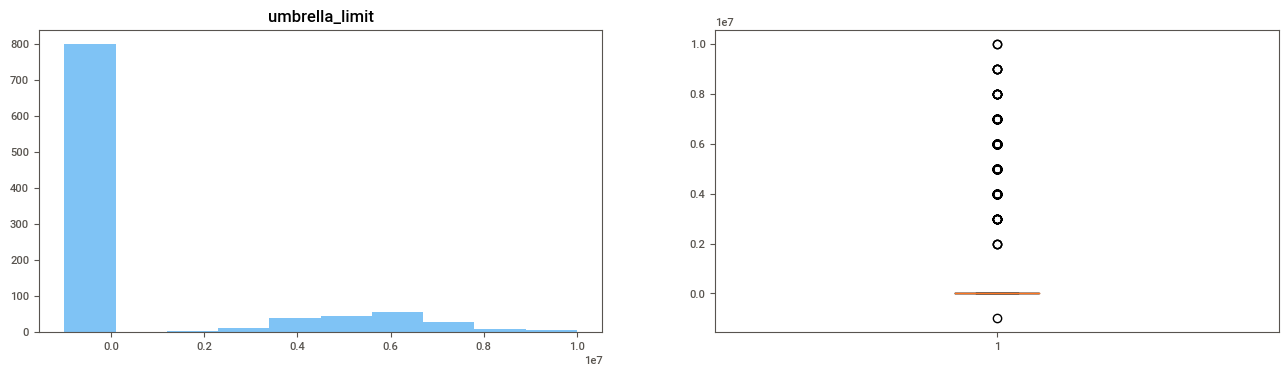

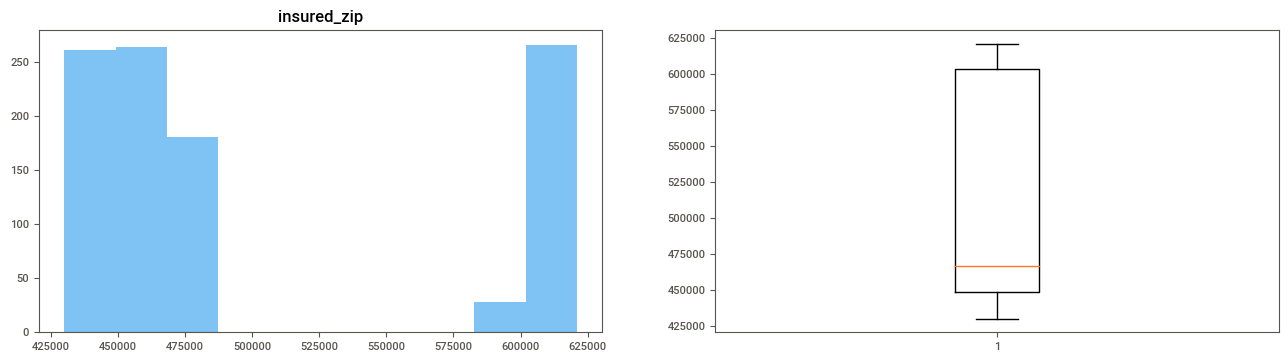

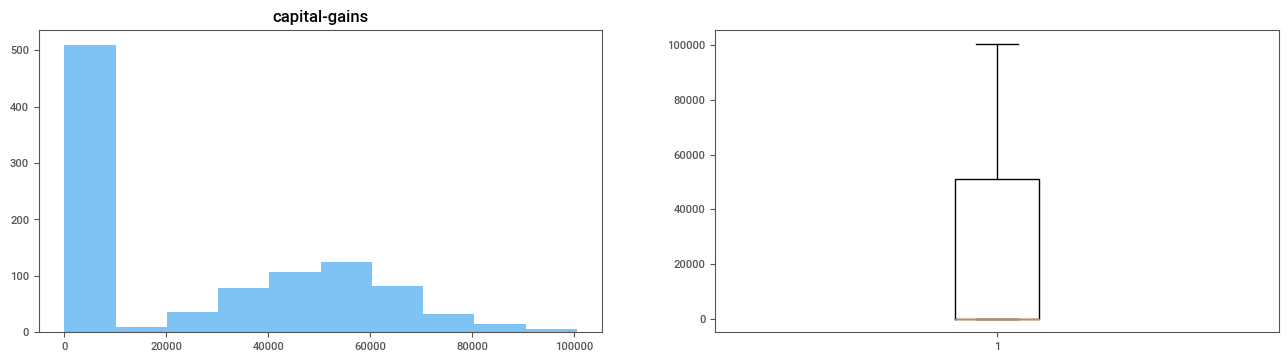

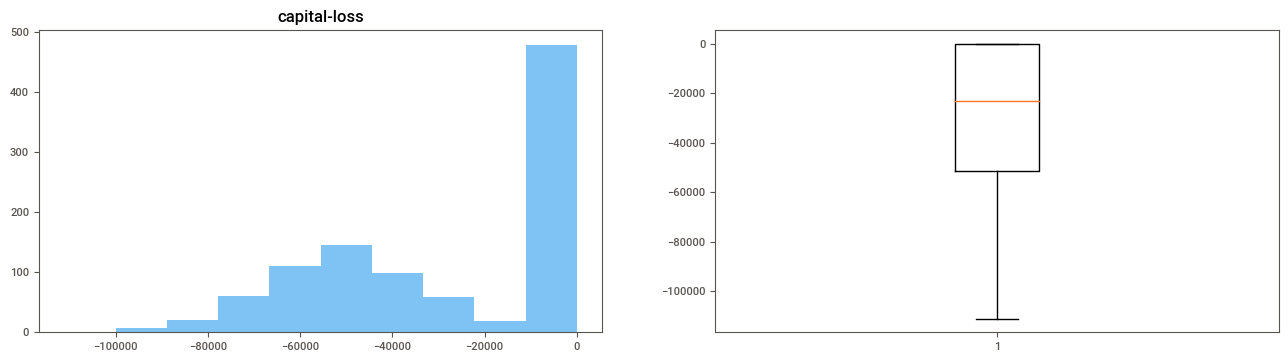

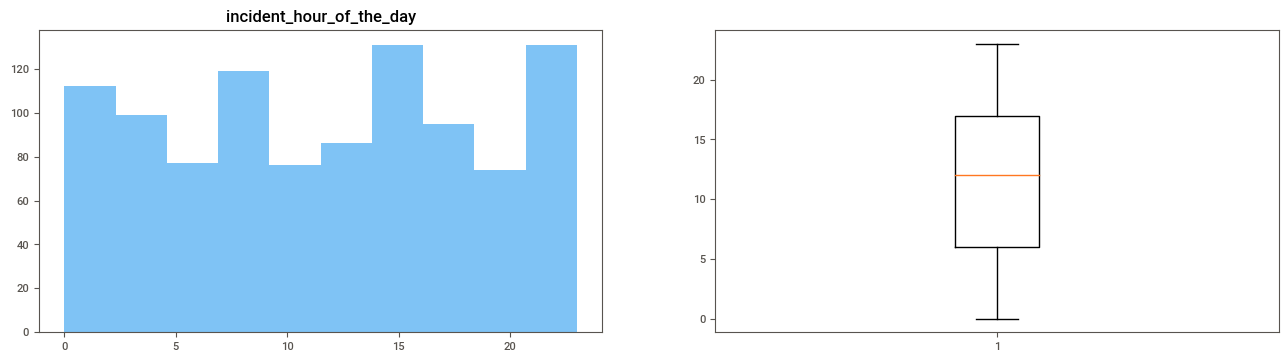

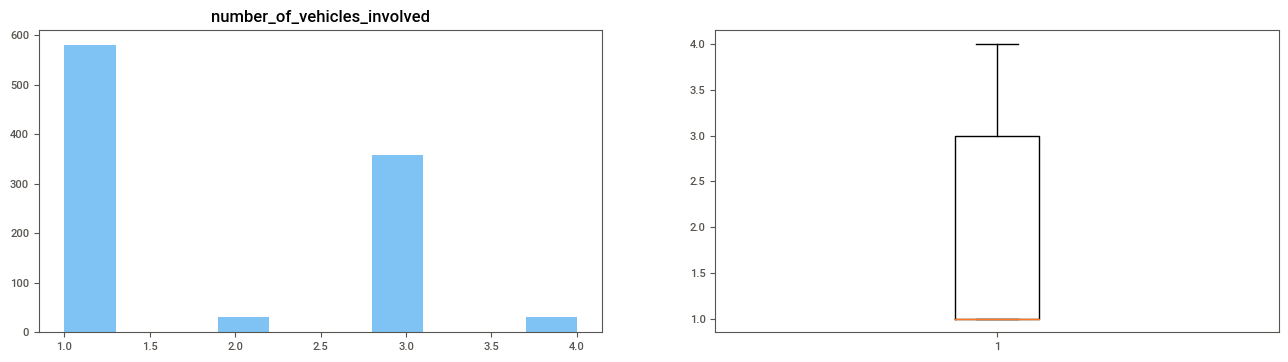

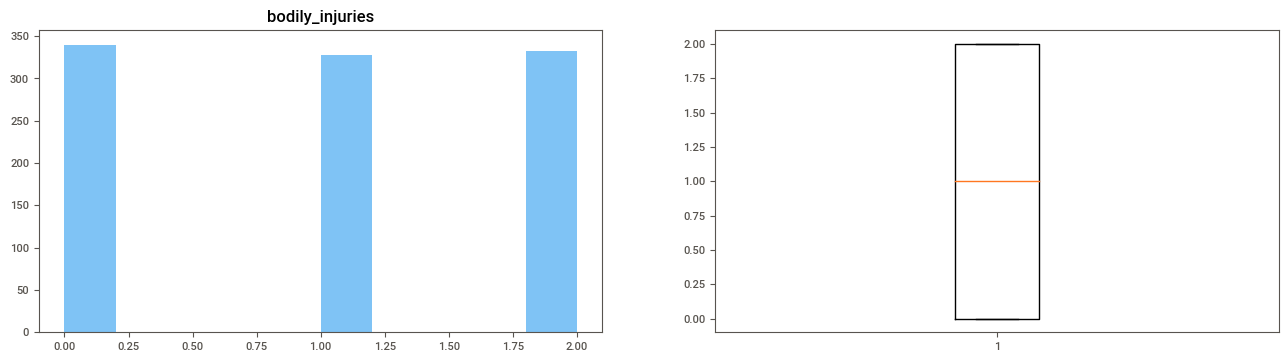

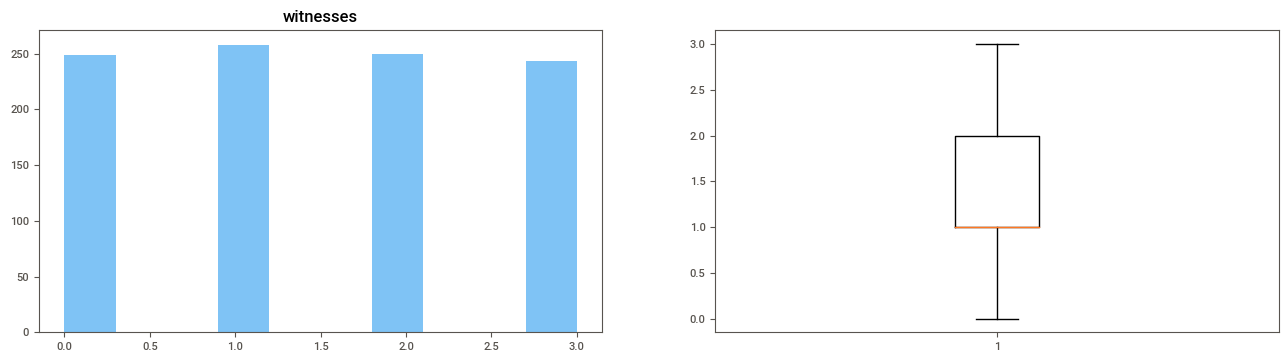

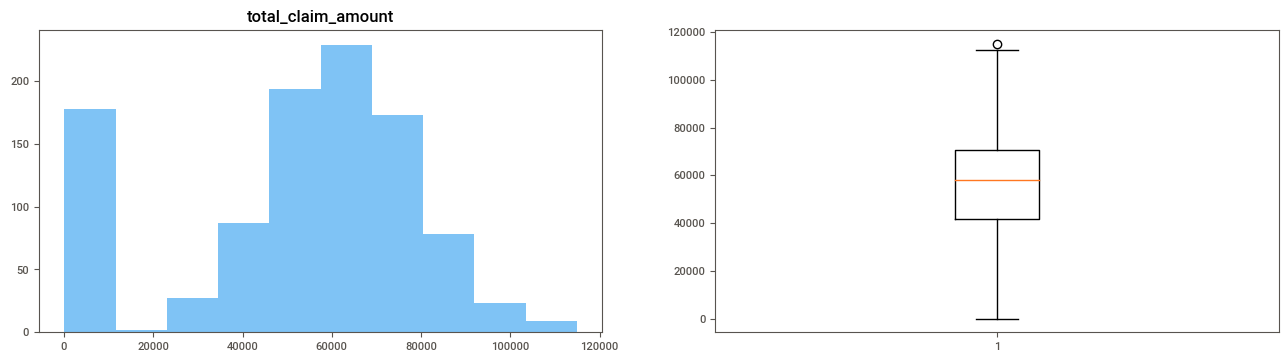

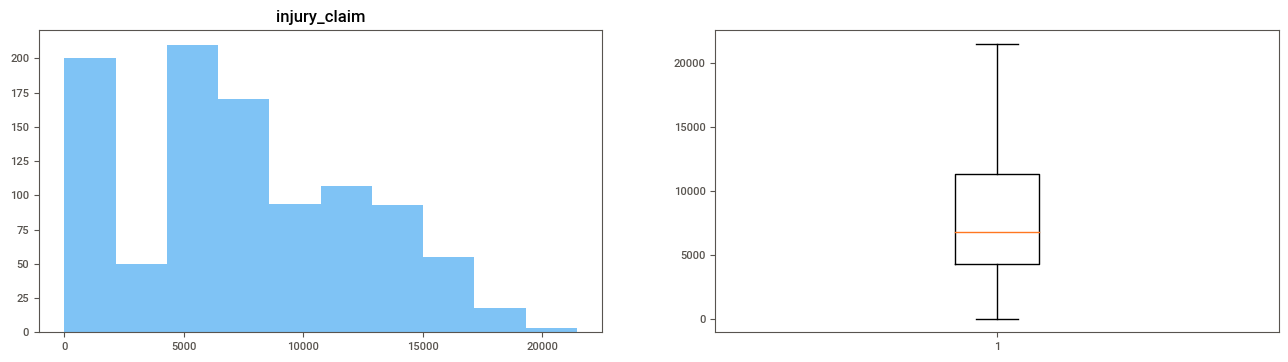

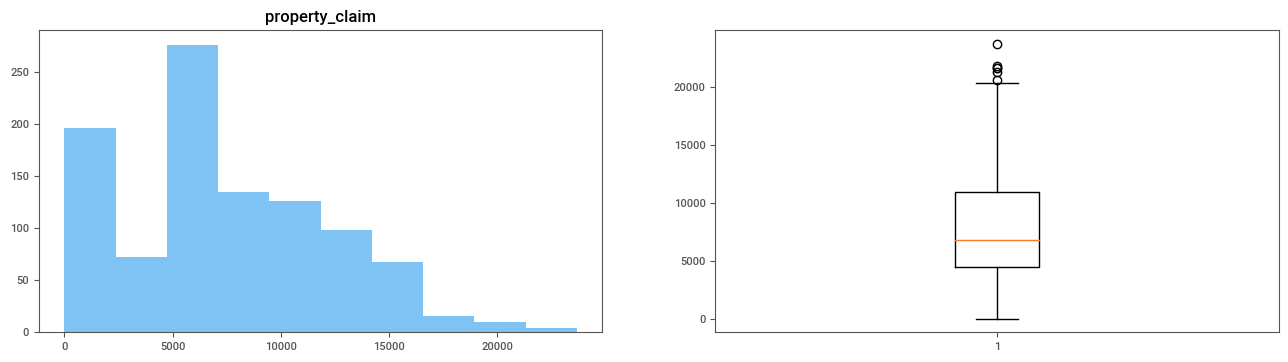

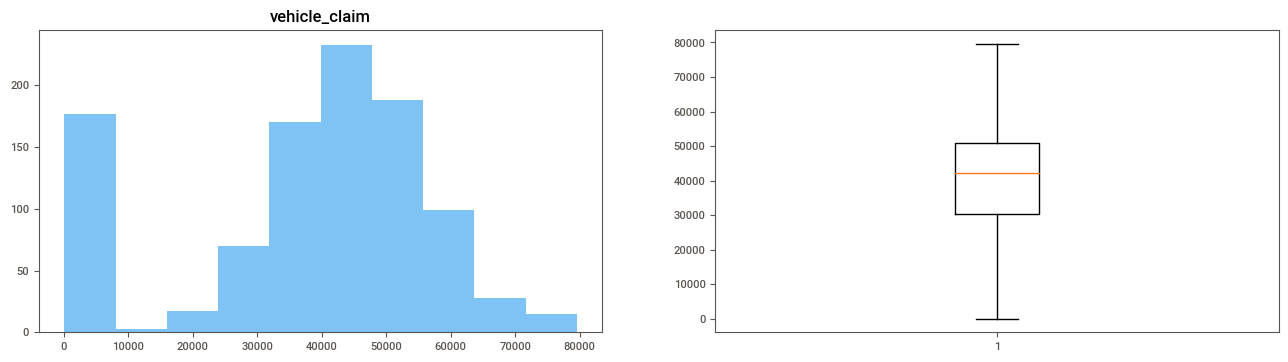

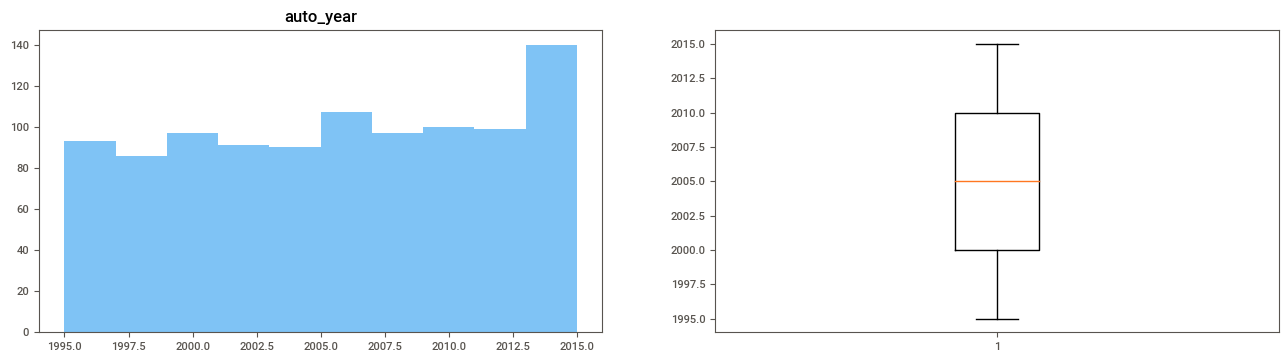

In [15]:
#In machine learning outlier detection is most important for building an accutate model to get good results
#lets create a function that deals with checking outliers
def plotingvariables(df, column):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.hist(df[column], alpha = 0.5)
    plt.title(column)

    plt.subplot(1,2,2)
    plt.boxplot(df[column])
    plt.show()
    
    
#creating the boxplots for the data
for i in num_col:
    plotingvariables(data, i)

In [16]:
#we can see from the plot umbrella_limit has more outliers lets drop the column
#some outliers are extreme values no need to worry about 

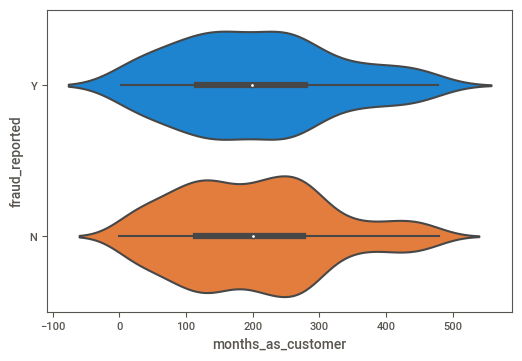

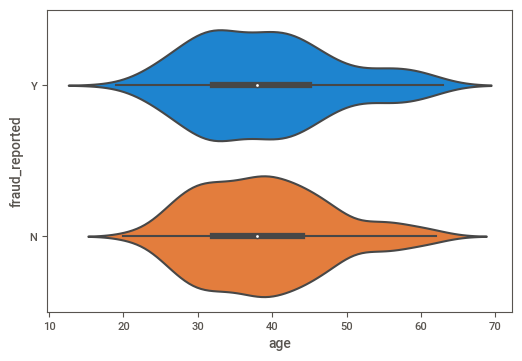

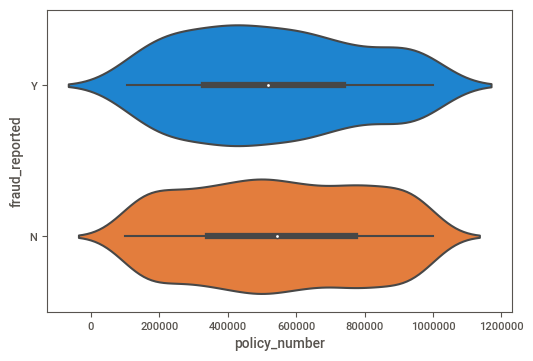

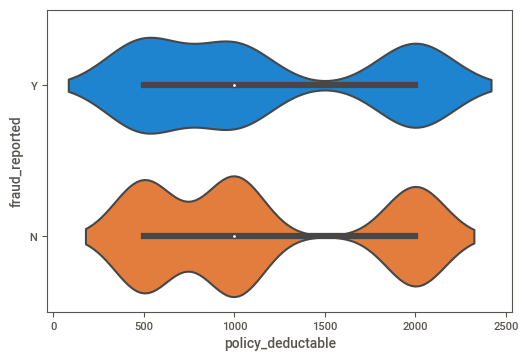

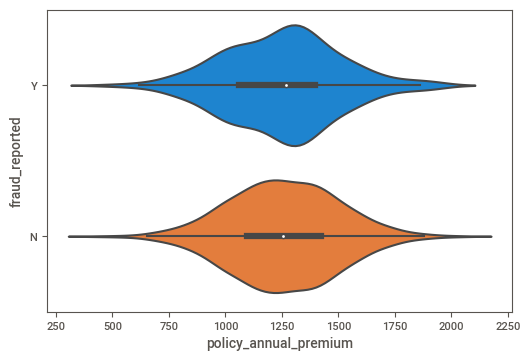

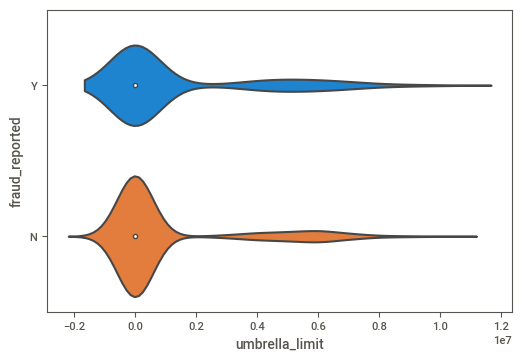

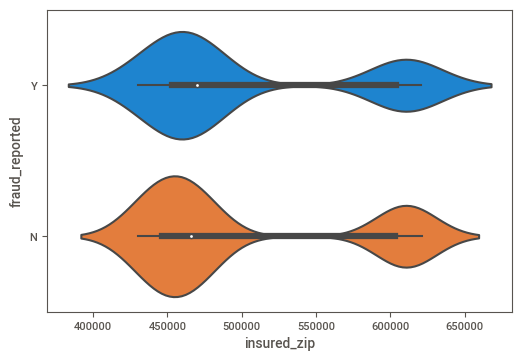

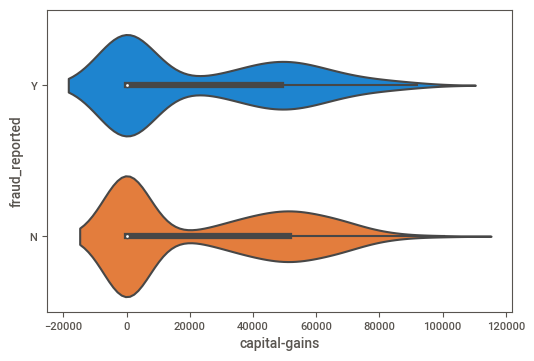

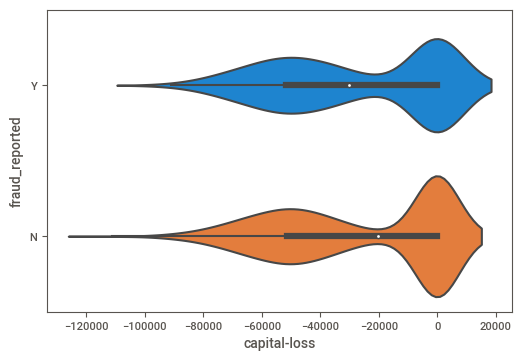

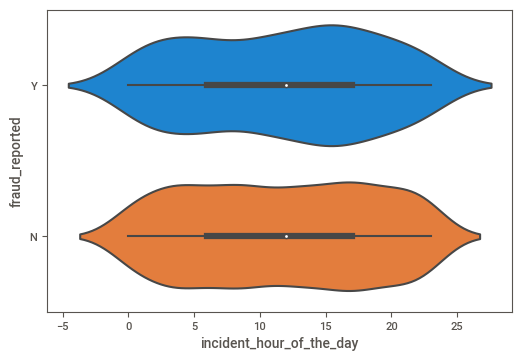

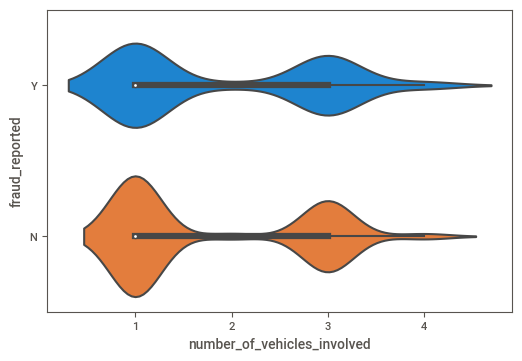

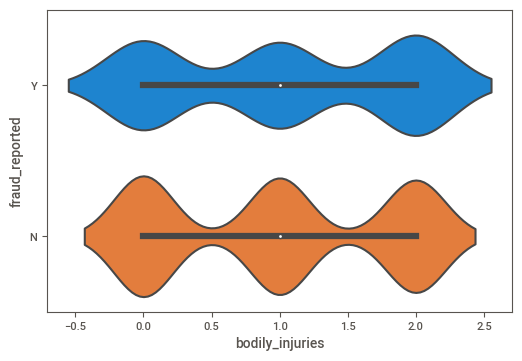

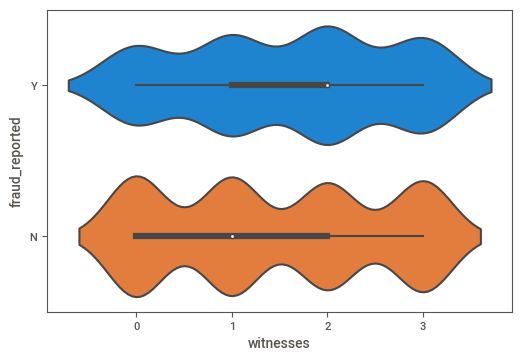

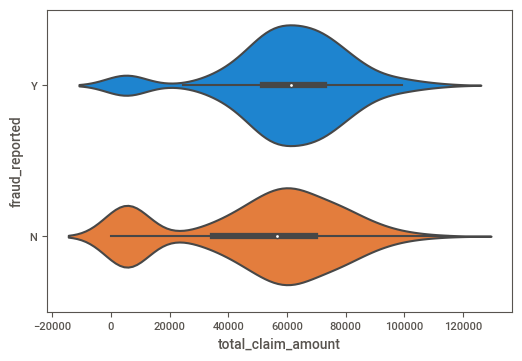

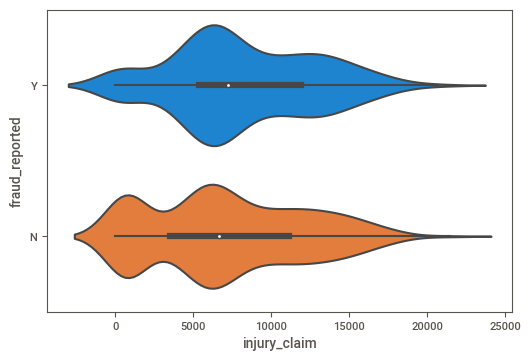

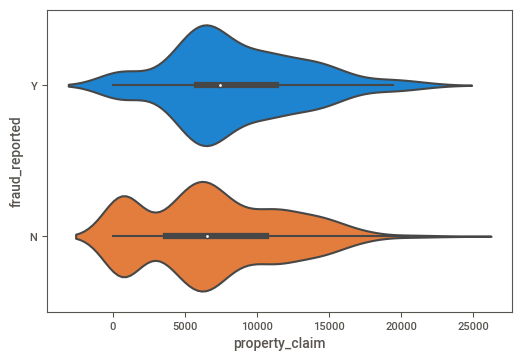

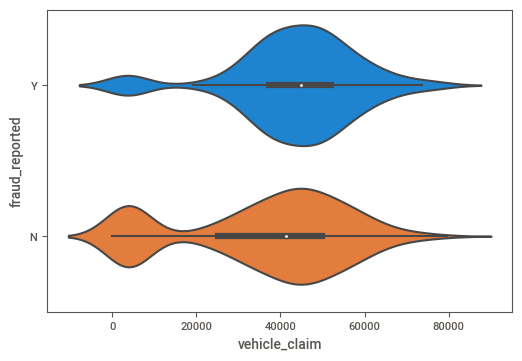

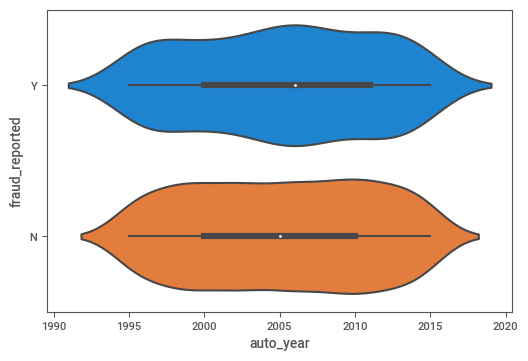

In [17]:
for i in num_col:
    sns.violinplot(x=i, y="fraud_reported", data=data)
    plt.show()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Feature Engineering

In [19]:
#but first we have to convert data into numerical data so that wecan apply PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [20]:
data.head(2)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                     YES               5070   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   

  fraud_reported  
0              Y  
1              Y  

[2 rows x 39 columns]

In [21]:
#here aw e are using map method to reduce the features such that we can get less number of features when applying label encoding 
for col in cat_col:
    print(col)
    print(data[col].value_counts())
    print("======================================================")

policy_bind_date
28-04-1992    3
01-01-2006    3
05-08-1992    3
15-05-1997    2
28-12-2002    2
             ..
15-01-1992    1
26-11-2001    1
15-06-2004    1
03-08-1994    1
07-11-2008    1
Name: policy_bind_date, Length: 951, dtype: int64
policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cl

In [22]:
#at first we have to covert Target as we are going to drop frpm the data
binary = {'Y' : 1, 'N' : 0 }
data.fraud_reported = data.fraud_reported.apply(lambda x: binary[x])

#we dont need auto_model columns lets drop it
data.drop(['auto_model'], axis = 1, inplace=True)



#we have replaced the incident data, lets drop the incident date column
data.drop(['incident_date'], axis = 1, inplace=True)

#there is no need of insure hobies so lets drop it
data.drop(['insured_hobbies'], axis = 1, inplace=True)

#we have removed all unnecessary columns from the data

# Feature Scaling

In [23]:
#at first we will divide the target variable from the data
x = data.drop(["fraud_reported"], axis = 1)
y = data["fraud_reported"]

In [24]:
from sklearn.preprocessing import LabelEncoder
x = x.apply(LabelEncoder().fit_transform)
x.head()

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                 299   29            480               532             2   
1                 212   23            257               821             1   
2                 123   10            672               186             2   
3                 239   22            140               766             0   
4                 212   25            286               181             0   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0           1                  1                    732               1   
1           1                  2                    396               5   
2           0                  2                    740               5   
3           1                  2                    743               6   
4           2                  1                    902               6   

   insured_zip  ...  property_damage  bodily_injuries  witnesses  \
0          486  ...                1                1          2   
1          519  ...                1                0          0   
2            6  ...                0                2          3   
3          812  ...                1                1          2   
4          850  ...                0                0          1   

   police_report_available  total_claim_amount  injury_claim  property_claim  \
0                        1                 563           258             512   
1                        1                  44            46              45   
2                        0                 143           337             104   
3                        0                 451           245             249   
4                        0                  81            70              36   

   vehicle_claim  auto_make  auto_year  
0            545         10          9  
1             38          8         12  
2            116          4         12  
3            521          3         19  
4             66          0         14  

[5 rows x 35 columns]

In [25]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()
rob = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x = rob

In [26]:
from sklearn.preprocessing import power_transform
new = pd.DataFrame(power_transform(x, method = 'yeo-johnson'), columns=x.columns)
x = new

In [27]:
x

months_as_customer       age  policy_number  policy_bind_date  \
0              1.142137  1.008315      -0.067550          0.211636   
1              0.298979  0.435259      -0.840045          1.258080   
2             -0.601036 -1.152737       0.597558         -1.047772   
3              0.563921  0.332088      -1.245345          1.059246   
4              0.298979  0.634348      -0.739586         -1.066019   
..                  ...       ...            ...               ...   
995           -1.867668  0.005124       1.508617          0.048269   
996            0.825760  0.332088      -1.380445         -1.255856   
997           -0.642398 -0.478624       1.394302          0.128154   
998            1.876747  2.145843       0.001732          0.360369   
999            1.867431  1.995619       0.081406         -0.417180   

     policy_state  policy_csl  policy_deductable  policy_annual_premium  \
0        1.191703    0.092941           0.066366               0.826455   
1       -0.027208    0.092941           1.272697              -0.350375   
2        1.191703   -1.198442           1.272697               0.854525   
3       -1.216110    0.092941           1.272697               0.865052   
4       -1.216110    1.285447           0.066366               1.423356   
..            ...         ...                ...                    ...   
995      1.191703    1.285447           0.066366               0.283012   
996     -1.216110   -1.198442           0.066366               0.942259   
997      1.191703    0.092941          -1.210563               0.682625   
998     -1.216110    1.285447           1.272697               0.545862   
999      1.191703    0.092941           0.066366              -1.665927   

     umbrella_limit  insured_zip  ...  property_damage  bodily_injuries  \
0         -0.443719    -0.035416  ...         0.714545         0.015375   
1          1.833110     0.079511  ...         0.714545        -1.212873   
2          1.833110    -1.708582  ...        -1.399493         1.226909   
3          1.878697     1.099293  ...         0.714545         0.015375   
4          1.878697     1.231483  ...        -1.399493        -1.212873   
..              ...          ...  ...              ...              ...   
995       -0.443719    -1.663238  ...         0.714545        -1.212873   
996       -0.443719     1.102772  ...         0.714545         1.226909   
997        1.602378    -1.098297  ...         0.714545         1.226909   
998        1.833110    -1.181977  ...         0.714545        -1.212873   
999       -0.443719     1.269746  ...         0.714545        -1.212873   

     witnesses  police_report_available  total_claim_amount  injury_claim  \
0     0.489685                 0.722544            0.892658     -0.125088   
1    -1.373083                 0.722544           -1.486248     -1.316549   
2     1.328887                -1.383999           -1.033331      0.291264   
3     0.489685                -1.383999            0.378246     -0.195186   
4    -0.400943                -1.383999           -1.317012     -1.177028   
..         ...                      ...                 ...           ...   
995  -0.400943                 0.722544            1.545522      1.700983   
996   1.328887                 0.722544            1.798559      1.729173   
997   1.328887                 0.722544            0.635387      0.223831   
998  -0.400943                 0.722544           -0.662514     -0.618946   
999   1.328887                 0.722544           -1.490821     -1.486517   

     property_claim  vehicle_claim  auto_make  auto_year  
0          1.214639       0.945373   0.853445  -0.198887  
1         -1.348440      -1.479376   0.349385   0.301482  
2         -1.006909      -1.104975  -0.638382   0.301482  
3         -0.187499       0.831099  -0.881563   1.498755  
4         -1.400899      -1.344932  -1.604275   0.639794  
..              ...            ...        ...        ...  
995        0.517831     

In [28]:
#now lets create pipelines
## Pipelines Creation
## 1. Data Preprocessing by using Standard Scaler
## 2. Reduce Dimension using PCA
## 3. Apply  Classifier

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
#as first lets divide the data into test and validate
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(670, 35) (670,) (330, 35) (330,)


In [30]:
pipeline_lr = Pipeline([
    ('scalar1', StandardScaler()),
    ('pca1', PCA(n_components = 2)),
    ('lr_classifier1', LogisticRegression(random_state = 0))
])

In [31]:
pipeline_dt = Pipeline([
    ('scalar2', StandardScaler()),
    ('pca2', PCA(n_components = 2)),
    ('lr_classifier2', DecisionTreeClassifier())
])

In [32]:
pipeline_rn = Pipeline([
    ('scalar3', StandardScaler()),
    ('pca3', PCA(n_components = 2)),
    ('lr_classifier3', RandomForestClassifier())
])

In [33]:
#lets make the list of pipelines 
pipelines = [pipeline_lr,pipeline_dt,pipeline_rn]

In [34]:
best_accuracy = 0
best_classifier = 0
best_pipelines = ""

In [35]:
#dictionary of pipelines used for easy refrences
pipe_dict = {0 : 'LogisticRegression', 1 : 'DecisionTreeClassifier', 2 : 'RandomForestClassifier'}

#fitting the pipelines to the data
for pipe in pipelines:
    pipe.fit(x_train,y_train)

In [36]:
for i ,model in enumerate(pipelines):
    print("{} accuracy is {}".format(pipe_dict[i], model.score(x_test,y_test)))
    prediction = model.predict(x_test)
    print("Classiscation report is \n\n {}".format(classification_report(y_test, prediction)))
    print("confusion_matrix is  \n\n {}".format(confusion_matrix(y_test, prediction)))
    print('==================================================================================')

LogisticRegression accuracy is 0.7515151515151515
Classiscation report is 

               precision    recall  f1-score   support

           0       0.75      1.00      0.86       248
           1       0.00      0.00      0.00        82

    accuracy                           0.75       330
   macro avg       0.38      0.50      0.43       330
weighted avg       0.56      0.75      0.64       330

confusion_matrix is  

 [[248   0]
 [ 82   0]]
DecisionTreeClassifier accuracy is 0.6272727272727273
Classiscation report is 

               precision    recall  f1-score   support

           0       0.76      0.75      0.75       248
           1       0.26      0.27      0.26        82

    accuracy                           0.63       330
   macro avg       0.51      0.51      0.51       330
weighted avg       0.63      0.63      0.63       330

confusion_matrix is  

 [[185  63]
 [ 60  22]]
RandomForestClassifier accuracy is 0.7090909090909091
Classiscation report is 

              

In [37]:
results = []
names = []

for i, model in enumerate(pipelines):
    kfold = KFold(n_splits=10, random_state=100)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    names.append(i)
    
    msg = '%s: %f, %f' % (pipe_dict[i], cv_results.mean(), cv_results.std())
    print(msg)

LogisticRegression: 0.753000, 0.032573
DecisionTreeClassifier: 0.628000, 0.024000
RandomForestClassifier: 0.717000, 0.030676


In [39]:
# for i, model in enumerate(pipelines):
if model.score(x_test,y_test) > best_accuracy:
    best_accuracy = model.score(x_test,y_test)
    best_classifier = i
    best_pipelines = model
    print("classifier with best accuracy is {}".format(pipe_dict[best_classifier]))

classifier with best accuracy is RandomForestClassifier


In [40]:
# As we can see this we have logistic regression with best accuracy of 75 percent
#we can perform hyperparameter tuning for logistic regression


# Hyper parameter tuning

In [41]:
#parameters

parameters = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01]
}

In [42]:
grid1 = GridSearchCV(LogisticRegression(), parameters, cv = 5, verbose=0, n_jobs= -1) # fitting the model
grid1.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None

In [43]:
print(grid1.best_params_)

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


score is 80.60606060606061
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Classiscation report is 

               precision    recall  f1-score   support

           0       0.83      0.93      0.88       248
           1       0.67      0.44      0.53        82

    accuracy                           0.81       330
   macro avg       0.75      0.68      0.70       330
weig

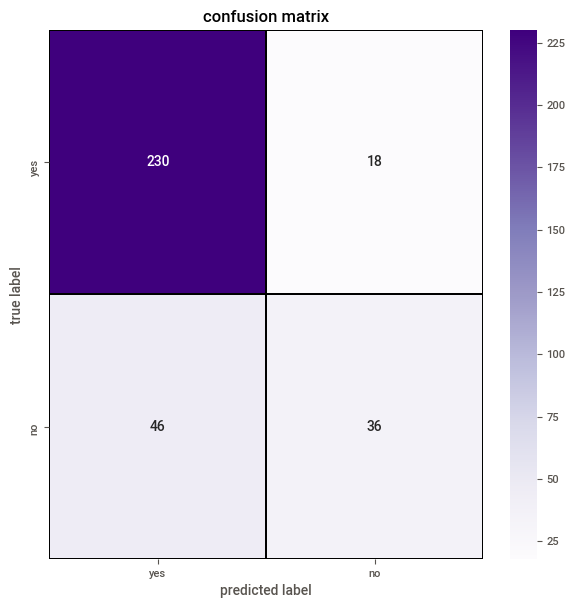

In [47]:
print("score is {}".format(grid1.score(x_test,y_test)*100))
predictions = grid1.predict(x_test)
print(predictions)
print("Classiscation report is \n\n {}".format(classification_report(y_test, predictions)))
print("confusion_matrix is  \n\n {}".format(confusion_matrix(y_test, predictions)))


#ploting the confusion matrix
cm1 = confusion_matrix(y_test, predictions)
x_labe = ["yes", "no"]
y_labe = ["yes", "no"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm1, annot=True, linewidths=0.2, linecolor="black", fmt = ".0f", ax = ax, cmap="Purples", xticklabels=x_labe, yticklabels=y_labe)
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()


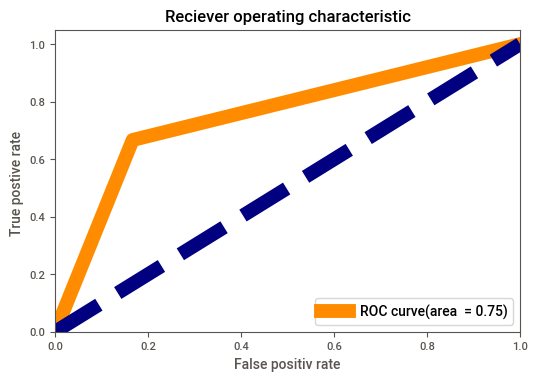

In [48]:
#ploting the auc-roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(predictions, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr ,tpr, color='darkorange', lw=10, label='ROC curve(area  = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color = 'navy', lw = 10, linestyle = '--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.05])
plt.xlabel("False positiv rate")
plt.ylabel("True postive rate ")
plt.title("Reciever operating characteristic")
plt.legend(loc = "lower right")
plt.show()

# Saving the model

In [49]:
#importing and saving the model
import joblib
joblib.dump(grid1, "Insurence_model.obj")
 
#Loading the saved model
saved_model = joblib.load("Insurence_model.obj")

# conclusion

In [50]:
a = np.array(y_test)
saved_model.fit(x_train,y_train)
new_prediction = saved_model.predict(x_test)
submission = pd.DataFrame({'original': a, 'predictions' : new_prediction}, index=range(len(a)))

In [52]:
submission.sample(10)

original  predictions
266         1            1
224         0            0
127         1            1
155         0            0
265         1            0
40          0            0
323         0            0
154         0            0
106         1            1
207         0            0